# Lab 1: Basic Transmitter & Modulation Explorer
Welcome to the first step of your digital communications lab! 🎓

In this notebook, we'll simulate the very first part of a communications system: the **transmitter**.

### You will learn:
- How to generate digital bits
- How to modulate those bits using BPSK, QPSK, and 16QAM
- How to visualize modulated signals in the I/Q (constellation) plane
- How to analyze symbol power and distribution


## 1. Set Parameters

In [43]:
# User-defined parameters
num_bits = 1024  # Number of bits to transmit
mod_type = '16QAM'  # Choose: 'BPSK', 'QPSK', or '16QAM'

## 2. Import Required Libraries

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 3. Generate Random Bitstream

In [45]:
bits = np.random.randint(0, 2, num_bits)
print(f"First 32 bits: {bits[:32]}")

First 32 bits: [0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0]


## 4. Modulate the Bits

In [46]:
def modulate(bits, mod_type='QPSK'):
    if mod_type == 'BPSK':
        return (1 - 2 * bits) + 0j
    elif mod_type == 'QPSK':
        symbols = []
        for i in range(0, len(bits), 2):
            b0, b1 = bits[i], bits[i+1]
            symbol = (1 - 2*b0) + 1j*(1 - 2*b1)
            symbols.append(symbol / np.sqrt(2))
        return np.array(symbols)
    elif mod_type == '16QAM':
        mapping = {
            (0,0,0,0): -3-3j, (0,0,0,1): -3-1j, (0,0,1,0): -3+3j, (0,0,1,1): -3+1j,
            (0,1,0,0): -1-3j, (0,1,0,1): -1-1j, (0,1,1,0): -1+3j, (0,1,1,1): -1+1j,
            (1,0,0,0):  3-3j, (1,0,0,1):  3-1j, (1,0,1,0):  3+3j, (1,0,1,1):  3+1j,
            (1,1,0,0):  1-3j, (1,1,0,1):  1-1j, (1,1,1,0):  1+3j, (1,1,1,1):  1+1j,
        }
        symbols = []
        for i in range(0, len(bits), 4):
            group = tuple(bits[i:i+4])
            symbol = mapping.get(group, 0)
            symbols.append(symbol / np.sqrt(10))
        return np.array(symbols)
    else:
        raise ValueError("Unsupported modulation type")

## 5. Apply Modulation to Bitstream

In [47]:
symbols = modulate(bits, mod_type)
print(f"First 8 symbols: {symbols[:8]}")

First 8 symbols: [-0.9486833 +0.31622777j  0.31622777-0.9486833j  -0.9486833 +0.31622777j
  0.9486833 -0.31622777j  0.9486833 +0.9486833j  -0.31622777-0.31622777j
 -0.31622777+0.31622777j  0.31622777-0.9486833j ]


## 6. Plot the I/Q Constellation Diagram

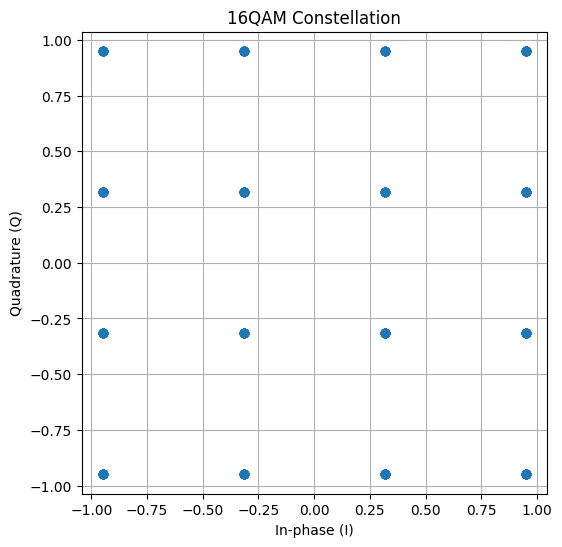

In [48]:
plt.figure(figsize=(6, 6))
plt.plot(np.real(symbols), np.imag(symbols), 'o')
plt.title(f'{mod_type} Constellation')
plt.xlabel('In-phase (I)')
plt.ylabel('Quadrature (Q)')
plt.grid(True)
plt.axis('equal')
plt.show()

## 7. Analyze Symbol Power

In [50]:
power = np.mean(np.abs(symbols)**2)
print(f"Average symbol power: {power:.2f}")

Average symbol power: 1.02


## 8. Summary
- You’ve generated bits and modulated them using basic digital modulation schemes.
- You visualized the I/Q symbols and calculated average power.

**Next Lab:** You’ll map these symbols to subcarriers and construct OFDM waveforms using the IFFT.
